<a href="https://colab.research.google.com/github/vasisthhkrisha-kv/AI-Project-/blob/main/AI_project_file_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Aim :- To detect and remove outliers from a detaset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Generating random data
np.random.seed(42)
data = np.random.normal(50, 10, 100)   # mean=50, std=10, 100 samples

# Adding outliers
data = np.append(data, [120, 130, 5, 2])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Value'])
print("Original Data:\n", df.head())

Original Data:
        Value
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


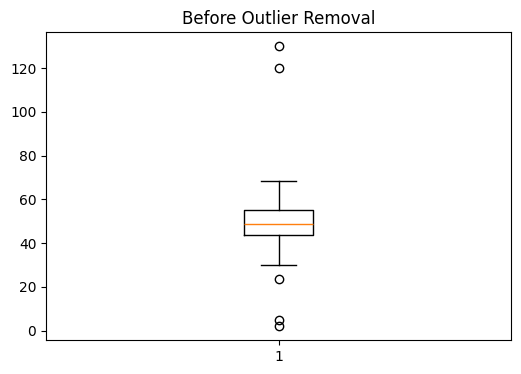

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Value'])
plt.title("Before Outlier Removal")
plt.show()

In [ ]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]
print("\nAfter IQR Method:\n", df_iqr.describe())


After IQR Method:
            Value
count  99.000000
mean   49.215666
std     8.763243
min    30.124311
25%    44.185369
50%    48.843517
75%    54.362061
max    68.522782


In [ ]:
z = np.abs(stats.zscore(df['Value']))
df_zscore = df[(z < 3)]
print("\nAfter Z-Score Method:\n", df_zscore.describe())


After Z-Score Method:
             Value
count  101.000000
mean    48.526272
std     10.039275
min      5.000000
25%     43.982934
50%     48.617357
75%     53.756980
max     68.522782


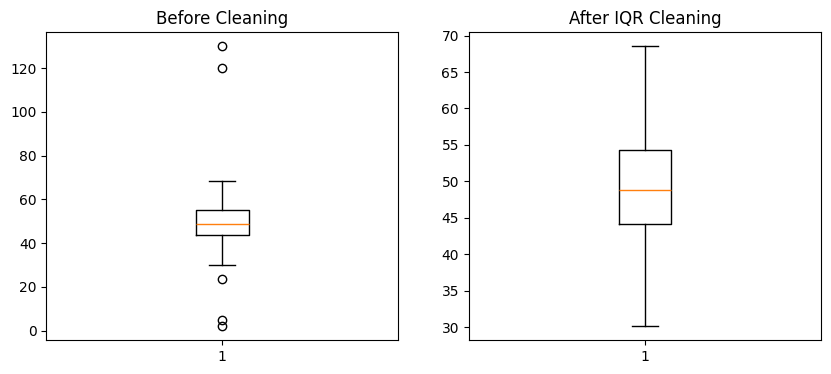

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.boxplot(df['Value'])
plt.title("Before Cleaning")

plt.subplot(1,2,2)
plt.boxplot(df_iqr['Value'])
plt.title("After IQR Cleaning")

plt.show()

In [ ]:
print(f"Original data count: {len(df)}")
print(f"After IQR cleaning: {len(df_iqr)}")
print(f"After Z-Score cleaning: {len(df_zscore)}")

Original data count: 104
After IQR cleaning: 99
After Z-Score cleaning: 101
